## Challenge 7
name: Robert Fang
date: April 26, 2019

### Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split

#### Attribute Information:

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)

In [2]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
house_votes = pd.read_csv("house-votes-84.data", names=column_names)

In [3]:
house_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
#Replace y and n to 1 and 0s, and replace ? with the mean of the whole votes
house_votes.replace(to_replace='y', value=1, inplace=True)
house_votes.replace(to_replace='n', value=0, inplace=True)

In [8]:
house_votes.replace(to_replace='?', value=np.nan, inplace=True)
house_votes.fillna(house_votes.mean(), inplace=True)

In [9]:
house_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### Challenge 2

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [16]:
#Settings: Where applicable, use test_size=.30, random_state=4444. 
X_train, X_test, y_train, y_test = train_test_split(house_votes.iloc[:, 1:], house_votes.iloc[:, 0], 
                                                    test_size = 0.3, random_state=44)

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [128]:
X = house_votes.iloc[:, 1:]
y = house_votes.iloc[:, 0]

In [129]:
# search for an optimal value of K for KNN
k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9254907882814859, 0.9350145978052955, 0.9351203060505388, 0.9397739857042182, 0.9283021242323569, 0.9352839021443673, 0.9307913017215343, 0.9352839021443673, 0.9329029497634149, 0.9329029497634149, 0.928410349340582, 0.9306830766133093, 0.9261376220678545, 0.9260293969596296, 0.9261376220678545, 0.9306830766133093, 0.9260293969596296, 0.928410349340582, 0.9214839424141751]


In [130]:
k_range[k_scores.index(max(k_scores))]

4

Text(0.5, 1.0, 'KNN - Accuracy vs K')

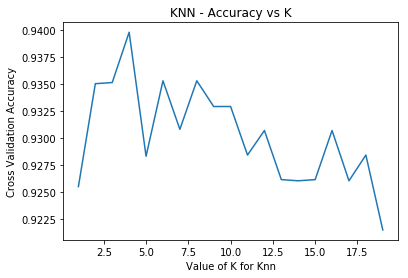

In [131]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for Knn')
plt.ylabel('Cross Validation Accuracy')
plt.title('KNN - Accuracy vs K')

### Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [133]:
C_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lr_scores = []
for c in C_range:
    lr = LogisticRegression(solver= 'liblinear', C=c)
    scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
    lr_scores.append(scores.mean())
print(lr_scores)

[0.8892932648746601, 0.9006543843753146, 0.9444830363435015, 0.9582276250880902, 0.9628813047417699, 0.9560656397865699, 0.9560656397865699]


Text(0.5, 1.0, 'Logistic Regression - Accuracy vs C')

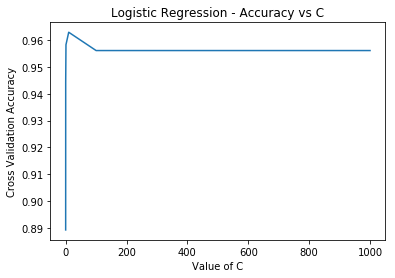

In [134]:
plt.plot(C_range, lr_scores)
plt.xlabel('Value of C')
plt.ylabel('Cross Validation Accuracy')
plt.title('Logistic Regression - Accuracy vs C')

In [135]:
C_range[lr_scores.index(max(lr_scores))]

10

### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

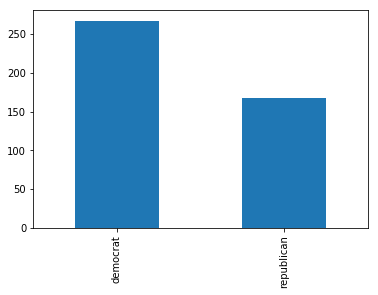

In [69]:
house_votes['party'].value_counts().plot(kind='bar')

In [145]:
def predict_democrat(X):
    results = []
    for i in X.index:
        results.append('democrat')
    return results

In [146]:
democrat_pred = predict_democrat(X_test)
democrat_score = accuracy_score(y_test, democrat_pred)
democrat_score

0.6335877862595419

In [147]:
def predict_republican(X):
    results = []
    for i in X.index:
        results.append('republican')
    return results

In [148]:
republican_pred = predict_republican(X_test)
republican_score = accuracy_score(y_test, republican_pred)
republican_score

0.366412213740458

### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [166]:
plots = pd.DataFrame(k_scores, columns = {'KNN'})
plots['republican_pred'] = republican_score
plots['democrat_pred'] = democrat_score
plots['Logistic_reg'] = lr_scores[4]

In [167]:
plots.head()

,KNN,republican_pred,democrat_pred,Logistic_reg
0,0.925491,0.366412,0.633588,0.962881
1,0.935015,0.366412,0.633588,0.962881
2,0.935120,0.366412,0.633588,0.962881
3,0.939774,0.366412,0.633588,0.962881
4,0.928302,0.366412,0.633588,0.962881


In [172]:
#reorganize df to classic table
df2=plots.stack().reset_index()
df2.columns = ['Series','Event','Values']

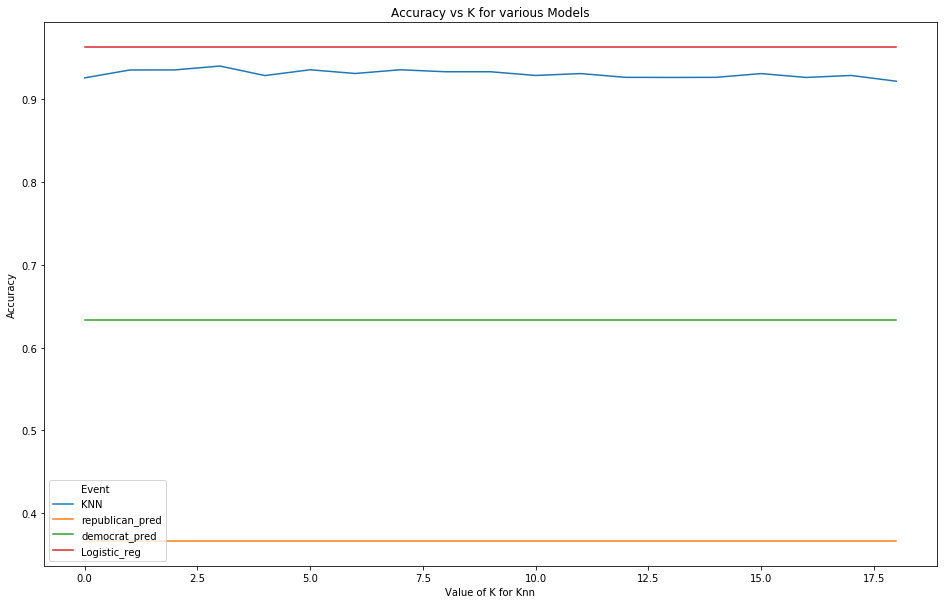

In [387]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.lineplot(x='Series', y="Values", hue='Event', data=df2)
plt.xlabel('Value of K for Knn')
plt.ylabel('Accuracy')
plt.title("Accuracy vs K for various Models");

### Challenge 7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [380]:
from sklearn.model_selection import learning_curve

In [381]:
[m, train_err, ts_err] = learning_curve(lr, house_votes.drop(['party'], 1), house_votes['party'], cv=5)

In [382]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

Text(0, 0.5, 'Accuracy')

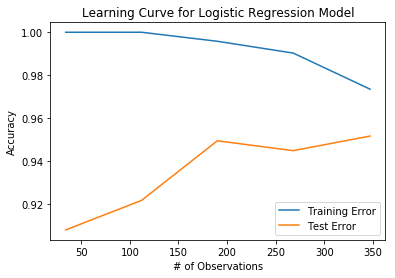

In [383]:
plt.plot(m, train_cv_err, label='Training Error')
plt.plot(m, test_cv_err, label = 'Test Error')
plt.title('Learning Curve for Logistic Regression Model')
plt.legend(loc=0)
plt.xlabel('# of Observations')
plt.ylabel('Accuracy')

### Learning Curve for Knn

In [384]:
[m_knn, train_err_knn, ts_err_knn] = learning_curve(KNeighborsClassifier(n_neighbors=4), house_votes.drop(['party'], 1), house_votes['party'], cv=5)

In [385]:
train_cv_err_knn = np.mean(train_err_knn, axis=1)
test_cv_err_knn = np.mean(ts_err_knn, axis=1)

Text(0, 0.5, 'Accuracy')

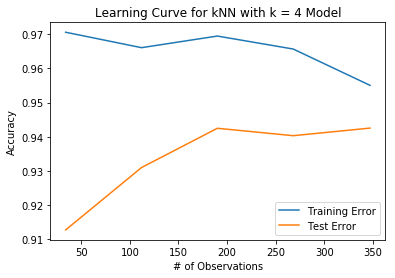

In [386]:
plt.plot(m, train_cv_err_knn, label='Training Error')
plt.plot(m, test_cv_err_knn, label = 'Test Error')
plt.title('Learning Curve for kNN with k = 4 Model')
plt.legend(loc=0)
plt.xlabel('# of Observations')
plt.ylabel('Accuracy')

### Challenge 8 & 9 combined, I been using cross_val_score

In [197]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Gaussian Naive Bayes

In [200]:
nb = GaussianNB()
scores_nb = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
scores_nb.mean()

0.9397739857042182

#### Support Vector Machine (SVM)

In [204]:
svm = SVC(C=1, kernel='rbf', gamma='auto')
scores_svm = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
scores_svm.mean()

0.9582804792107119

#### Decision Tree Classifier

In [205]:
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
scores_dt.mean()

0.9399954696466326

#### Random Forest Classifier

In [207]:
rf = RandomForestClassifier(n_estimators = 10)
scores_rf = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
scores_rf.mean()

0.9604474982381959

### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [212]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
house_votes_2 = pd.read_csv("house-votes-84.data", names=column_names)

In [213]:
house_votes_2.replace(to_replace='y', value=1, inplace=True)
house_votes_2.replace(to_replace='n', value=0, inplace=True)

In [220]:
house_votes_2.replace(to_replace='?', value=np.nan, inplace=True)
house_votes_2.fillna(house_votes.mode().iloc[0], inplace=True)

In [221]:
house_votes_2.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [222]:
del house_votes_2['party']

In [226]:
X = house_votes_2.iloc[:, 1:]
y = house_votes_2.iloc[:, 0]

In [232]:
k_range = list(range(1, 20))
k_scores_2 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores_2.append(scores.mean())
print(max(k_scores_2))

0.6842670894996477


In [233]:
k_range[k_scores_2.index(max(k_scores_2))]

13

### Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [234]:
def get_movie_data(file_url):
    data = pd.read_csv(file_url, skiprows = 0)
    return data

df_movies = get_movie_data('2013_movies.csv')

In [235]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


Text(0.5, 1.0, 'Rating Distribution')

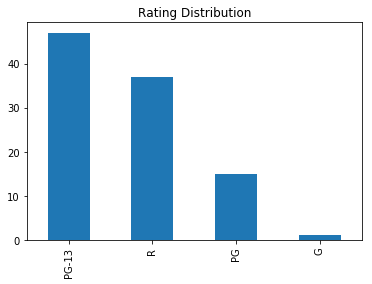

In [243]:
df_movies['Rating'].value_counts().plot(kind='bar')
plt.title("Rating Distribution")

In [263]:
df_movies['Budget'].fillna(df_movies['Budget'].mean(), inplace=True)

In [265]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                100 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [266]:
X = df_movies.drop(['Rating','Title','Director','ReleaseDate'], 1)
y = df_movies['Rating']

In [249]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=44)

#### Using GridSearchCV for practice

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [275]:
# define the parameter values that should be searched
k_range = list(range(2, 10))

In [276]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [277]:
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy')
grid.fit(X, y);

/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [278]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.46
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [326]:
param_grid = {
    'C': (0.01, 0.1, 1)
}

In [332]:
grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=2, scoring='accuracy')
grid_lr.fit(X, y);

/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anac

In [333]:
# examine the best model
print('Logistic Regression Accuracy:',grid_lr.best_score_)
print(grid_lr.best_params_)
print(grid_lr.best_estimator_)
print(grid_lr.best_estimator_.coef_)

Logistic Regression Accuracy: 0.54
{'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[-9.02619557e-08 -2.66712692e-09 -2.48541998e-12]
 [-9.77526625e-09 -4.03654634e-09 -1.66365800e-13]
 [ 7.58297993e-09 -3.76931490e-09 -3.44374357e-14]
 [-1.35935285e-08  7.49823166e-10  7.65419570e-14]]


In [334]:
param_grid = {}

In [338]:
grid_dummy = GridSearchCV(DummyClassifier(), param_grid, cv=2, scoring='accuracy')
grid_dummy.fit(X, y);

/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [339]:
print('Baseline Model Accuracy:', grid_dummy.best_score_)
print(grid_dummy.best_estimator_)

Baseline Model Accuracy: 0.36
DummyClassifier(constant=None, random_state=None, strategy='stratified')


In [340]:
.54/.36

1.5000000000000002

#### Logistic Regression was the best model using Gridsearch with a pickup of 50% over dummy model. I have also printed the coefficient above

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

What is the earliest year of surgery in this dataset?

What is the most recent year of surgery?

Use logistic regression to predict survival after 5 years. How well does your model do?

What are the coefficients of logistic regression? Which features affect the outcome how?

Draw the learning curve for logistic regression in this case.

### Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [341]:
df_survival = pd.read_csv("haberman.data", names=['age','year','nodes','status'])

In [342]:
df_survival.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [345]:
print('Average of Patient Age:', df_survival['age'].mean())
print('Stdev of Patient Age', df_survival['age'].std())

Average of Patient Age: 52.45751633986928
Stdev of Patient Age 10.80345234930328


In [347]:
df_survival_5 = df_survival[df_survival['status']==1]
print('Average of Patient survived > 5 Age:', df_survival_5['age'].mean())
print('Stdev of Patient survived > 5 Age', df_survival_5['age'].std())

Average of Patient survived > 5 Age: 52.01777777777778
Stdev of Patient survived > 5 Age 11.012154179929546


In [348]:
df_survival_less_5 = df_survival[df_survival['status']==2]
print('Average of Patient survived < 5 Age:', df_survival_less_5['age'].mean())
print('Stdev of Patient survived < 5 Age', df_survival_less_5['age'].std())

Average of Patient survived < 5 Age: 53.67901234567901
Stdev of Patient survived < 5 Age 10.16713720829741


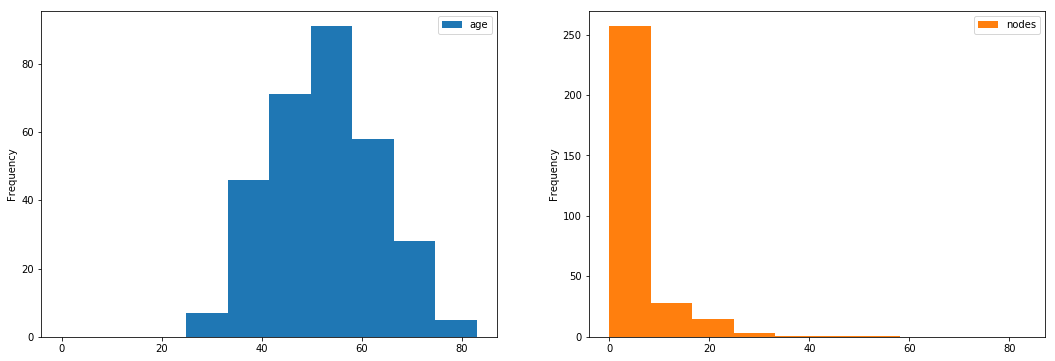

In [350]:
df_survival[['age', 'nodes']].plot(kind='hist', subplots = True, layout = (1,2), figsize = (18,6));

In [351]:
min(df_survival['year'])

58

In [352]:
max(df_survival['year'])

69

### Predict survival rate using Logistic Regression

In [353]:
X = df_survival.drop(['status'], 1)
y = df_survival['status']

In [354]:
param_grid = {
    'C': (0.01, 0.1, 1)
}

In [355]:
survival_lr = GridSearchCV(LogisticRegression(), param_grid, cv=2, scoring='accuracy')
survival_lr.fit(X, y);

/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/robfang29/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

In [364]:
# examine the best model
print('Logistic Regression Accuracy:',survival_lr.best_score_)
print(survival_lr.best_params_)
print(survival_lr.best_estimator_)
print(survival_lr.best_estimator_.coef_)

Logistic Regression Accuracy: 0.7222222222222222
{'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[[ 0.01739041 -0.03688385  0.08461413]]


In [370]:
coef = pd.DataFrame(survival_lr.best_estimator_.coef_, columns=['Age','Year','Nodes'])
coef

,Age,Year,Nodes
0,0.01739,-0.036884,0.084614


##### Age and Nodes impact your chances of survival, higher the age and number of nodes chances of survival beyond 5 years decrease, year has the opposite effect

In [372]:
[m, train_err, ts_err] = learning_curve(lr, X, y, cv=5)

In [373]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

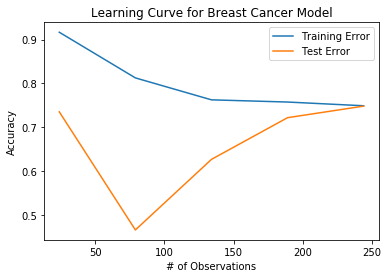

In [379]:
plt.plot(m, train_cv_err, label='Training Error')
plt.plot(m, test_cv_err, label = 'Test Error')
plt.title('Learning Curve for Breast Cancer Model')
plt.legend(loc=0)
plt.xlabel('# of Observations')
plt.ylabel('Accuracy');